# Linear and Logistic regression assignment

## Business Understanding

## Data understanding

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
data = real_estate_valuation.data.original


In [106]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [107]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Data preparation

Here we split the data into training and testing sets, and separate the features. We use 80/20 split and set a random state.

In [108]:
# Split features and target

X = data.drop(columns=['Y house price of unit area', 'No'])
y = data['Y house price of unit area']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (fit on train, transform both)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,0.001128,2.344015,-0.823965,0.968042,-0.147066,0.455057
234,0.296351,-0.821281,0.951418,-0.049170,-0.743117,-1.355926
5,-1.777321,-0.900856,0.917224,-0.388241,-0.504055,-1.427483
45,-0.297651,1.707419,-0.469361,1.307112,0.065523,0.739277
245,0.890353,-0.865489,-0.345357,0.289900,0.260463,0.953278
346,0.890353,-0.361518,0.536991,-0.727312,-0.418217,-1.149282
195,0.591573,-0.184685,-0.492154,0.289900,-1.210010,0.402226
382,-0.592874,-0.087428,2.031069,-1.405453,-2.989339,-1.198101
400,0.296351,0.840941,-0.474345,0.289900,0.400852,0.317294
296,-1.482098,-0.423409,0.069758,-0.049170,1.799125,0.045112


## Modeling

Here we create and train a linear regression model using the training data.

In [109]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Next we create and train a logistic regression model. We first convert the target variable into a binary classification problem by thresholding it at the mean value of the training target variable.

In [110]:
threshold = float(y_train.mean())
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)
logisticRegressionModel = LogisticRegression()
logisticRegressionModel.fit(X_train, y_train_binary)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Evaluation

First we evaluate the linear regression model using several different regression metrics
- MAE (mean absolute error)
- RMSE (root mean squared error)
- R2 (coefficient of determination)

We also visualize the scatter plot of actual vs predicted values.

MAE: 5.305355690074043
RMSE: 7.314753524521661
R2: 0.6810580555095946
b0 (intercept): 38.39154078549889
Coefficients:
X1 transaction date                       1.529631
X2 house age                             -3.062694
X3 distance to the nearest MRT station   -5.786926
X4 number of convenience stores           3.218873
X5 latitude                               2.855108
X6 longitude                             -0.441009
dtype: float64
First 5 predictions: [47.88625422 41.16404556 44.27301439 40.19761542 27.51326511]
First 5 actual values: [45.1 42.3 52.2 37.3 22.8]


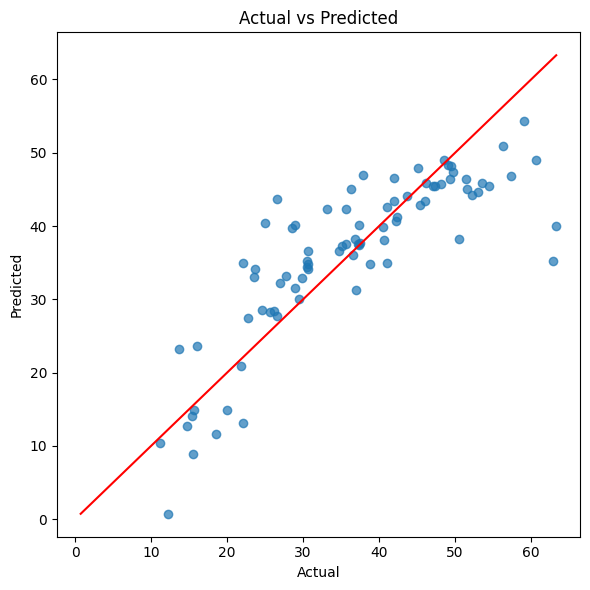

In [111]:

y_pred = linearRegressionModel.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
# Intercept + coefficients (mapped to feature names)
b0 = float(linearRegressionModel.intercept_)
coefs = pd.Series(linearRegressionModel.coef_, index=X_train.columns)


print("b0 (intercept):", b0)
print("Coefficients:")
print(coefs)

# Predictions (proof it predicts)
print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.values[:5])

# Valid plot for multivariate regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()



Now we evelaute the logistical regression model using accuracy, precision, recall, and F1-score. We also visualize the confusion matrix.

Logistic Regression Evaluation:
Accuracy: 0.8192771084337349
Precision: 0.7272727272727273
Recall: 0.9142857142857143
F1-score: 0.810126582278481


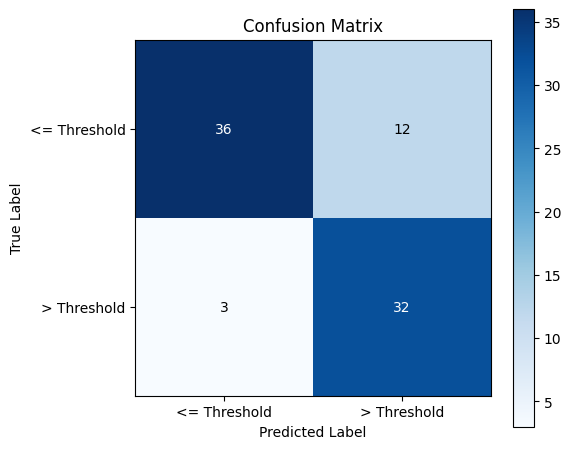

In [112]:
# Make predictions
y_pred = logisticRegressionModel.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred, zero_division=0)  # Handle edge cases
recall = recall_score(y_test_binary, y_pred, zero_division=0)
f1 = f1_score(y_test_binary, y_pred, zero_division=0)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Confusion Matrix with annotations
cm = confusion_matrix(y_test_binary, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ["<= Threshold", "> Threshold"])
plt.yticks(tick_marks, ["<= Threshold", "> Threshold"])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", 
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Deployment

Now we will predict the probability that the price of the house is above the average based on user inputs using logistical regression model.
Features that the user will need to input are:
- X1: transaction date
- X2: house age
- X3: distance to the nearest MRT station
- X4: number of convenience stores
- X5: latitude
- X6: longitude


In [113]:
features = X.columns.tolist()
Xi = pd.DataFrame(columns=features)

# read input data
for f in features:
    val = input(f"Enter value for feature: {f}: ")
    Xi[f] = [float(val)]

# standardize input using the same scaler
Xi = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)

# get probability estimate
p = logisticRegressionModel.predict_proba(Xi)[:, 1]

# output with clear interpretation
print(f"\nProbability of house price being above average: {p[0]:.2%}")
print(f"Probability of house price being below average: {1-p[0]:.2%}")

if p[0] > 0.5:
    print(f"\n✓ PREDICTION: The house price is likely ABOVE average (confidence: {p[0]:.2%})")
else:
    print(f"\n✓ PREDICTION: The house price is likely BELOW or EQUAL to average (confidence: {1-p[0]:.2%})")

KeyboardInterrupt: Interrupted by user